In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [26]:
data=pd.read_excel('C:\\Users\\This\\Desktop\\aaa.xlsx')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [27]:
data.shape

(9994, 21)

In [28]:
df=data.drop(['Row ID','Order ID','Order Date','Ship Date','Customer ID','Postal Code','Product ID'],
              inplace=True,axis=1)

In [29]:
data.head(3)

,Ship Mode,Customer Name,Segment,Country/Region,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       9994 non-null   object 
 1   Customer Name   9994 non-null   object 
 2   Segment         9994 non-null   object 
 3   Country/Region  9994 non-null   object 
 4   City            9994 non-null   object 
 5   State           9994 non-null   object 
 6   Region          9994 non-null   object 
 7   Category        9994 non-null   object 
 8   Sub-Category    9994 non-null   object 
 9   Product Name    9994 non-null   object 
 10  Sales           9994 non-null   float64
 11  Quantity        9994 non-null   int64  
 12  Discount        9994 non-null   float64
 13  Profit          9994 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [31]:
data.isnull().sum()

Ship Mode         0
Customer Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [32]:
data.shape

(9994, 14)

In [33]:
data.duplicated().sum()

1

In [34]:
data[data.duplicated()]

,Ship Mode,Customer Name,Segment,Country/Region,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,Standard Class,Laurel Beltran,Home Office,United States,Columbus,Ohio,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [35]:
data.drop_duplicates()

,Ship Mode,Customer Name,Segment,Country/Region,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


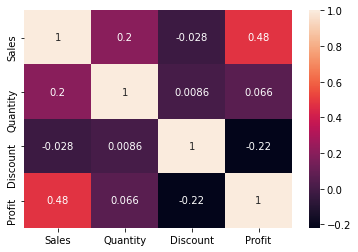

In [37]:
sns.heatmap(data.corr(), annot=True)
plt.show()

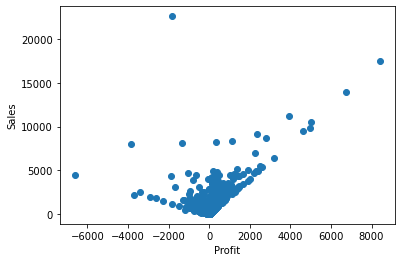

In [47]:
plt.scatter(x=data['Profit'], y=data['Sales'])
#plt.figure(figsize=(8,9))
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

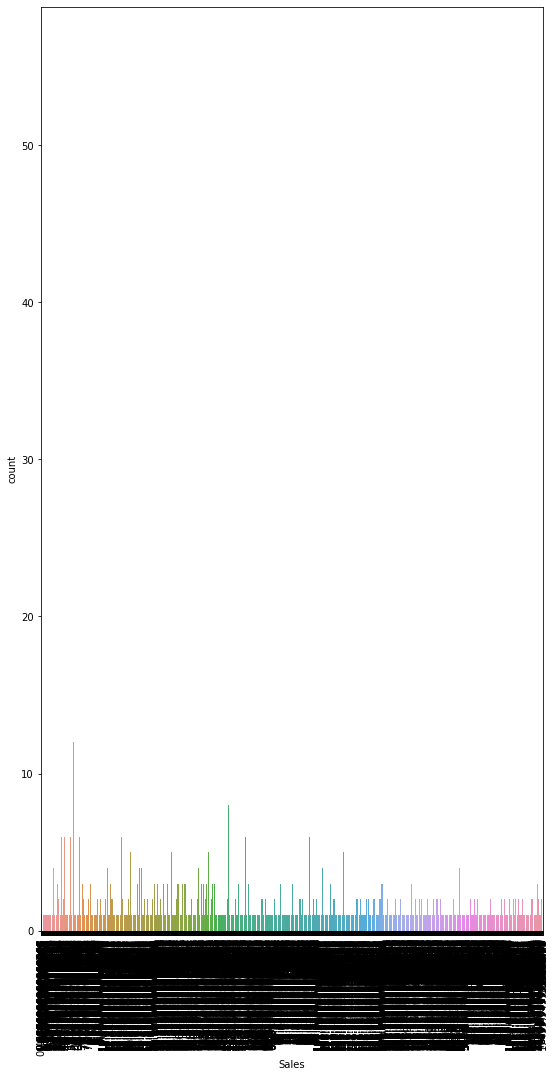

In [53]:
plt.figure(figsize=(9,17))
sns.countplot(data['Sales'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12,9))
sns.countplot(data['Profit'])
plt.xticks(rotation=90)
plt.show()

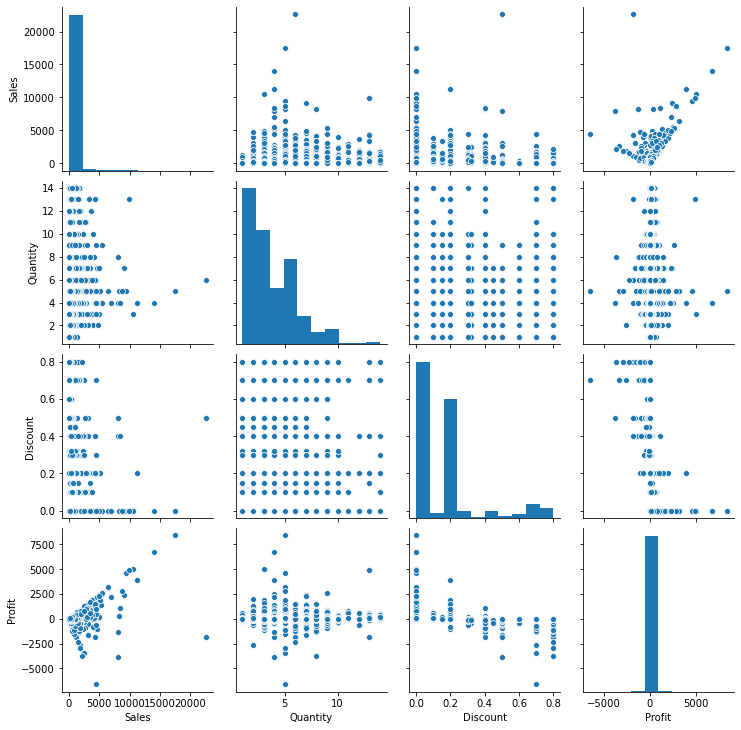

In [54]:
sns.pairplot(data)

In [65]:
data.groupby(['State'])[['Sales', 'Profit']].sum().sort_values('Profit', ascending= False).head(5)

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504


In [66]:
data.groupby(['State'])[['Sales', 'Profit']].sum().sort_values('Profit', ascending= False).tail(5)

,Sales,Profit
State,,
North Carolina,55603.1640,-7490.9122
Illinois,80166.1010,-12607.8870
Pennsylvania,116511.9140,-15559.9603
Ohio,78258.1360,-16971.3766
Texas,170188.0458,-25729.3563
